In [1]:
from contextlib import contextmanager
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.patches import Arc
from matplotlib.patches import FancyBboxPatch
import matplotlib.transforms as mtransforms

import numpy as np
from io import BytesIO
import base64

In [2]:
accent = 'orangered'
blue = 'royalblue'
dark = '#bbbbcc'  # Dark mode color
light = 'black'   # Light mode color

def makefig(frame=False):
    plt.figure(figsize=(1,1), dpi=100)
    if not frame:
        plt.axis('off');
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1)  

def tobase64():
    buf = BytesIO()
    plt.savefig(buf, format='svg', transparent=True)
    fig64 = base64.b64encode(buf.getvalue())
    return fig64

pngstrings = {}

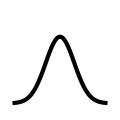

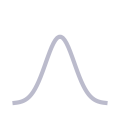

In [3]:
def draw_norm(color, name):
    makefig()
    x = np.linspace(-4.5,4.5,50)
    y = np.exp(-x**2/4)
    plt.plot(x, y, lw=3, color=color)
    plt.ylim(-.1, 1.4);
    pngstrings[name] = tobase64()

draw_norm(light, 'normal')
draw_norm(dark, 'normal_dark')

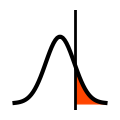

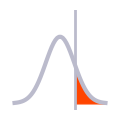

In [4]:
def draw_risk(color, name):
    makefig()
    limit = 1.5
    x = np.linspace(-4.5,4.5,50)
    y = np.exp(-x**2/4)
    plt.plot(x, y, lw=3, color=color)
    plt.axvline(limit, color=color, lw=2)
    plt.fill_between(x, y, where=(x>limit), color=accent)
    plt.ylim(-.1, 1.4)
    pngstrings[name] = tobase64()

draw_risk(light, 'risk')
draw_risk(dark, 'risk_dark')

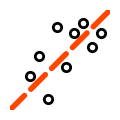

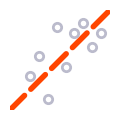

In [5]:
def draw_curve(color, name):
    makefig()
    np.random.seed(142941)
    
    x = np.linspace(.2,1, num=10)
    y = np.random.normal(loc=x, scale=.2)
    plt.plot(x, y, marker='o', ls='', color=color, mew=2, markersize=6, mfc='none', mec=color)
    plt.plot([0, 1], [0, 1], color=accent, ls='--', lw=4, zorder=0, dash_capstyle='round');
    plt.xlim(0,1)
    plt.ylim(0,1)
    pngstrings[name] = tobase64()

draw_curve(light, 'curvefit')
draw_curve(dark, 'curvefit_dark')

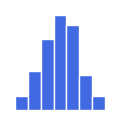

In [6]:
makefig()
np.random.seed(623460)
plt.hist(np.random.normal(size=100), bins=7, color=blue, edgecolor='white');
pngstrings['histogram'] = tobase64()
pngstrings['histogram_dark'] = tobase64()

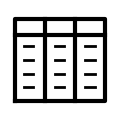

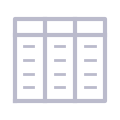

In [7]:
def draw_table(color, name):
    makefig()
    bot = .1
    plt.plot([0,1,1,0,0], [bot,bot,1,1,bot], color=color, lw=3)
    plt.plot([.33, .33], [bot, 1], color=color, lw=3)
    plt.plot([.66, .66], [bot, 1], color=color, lw=3)
    plt.plot([0, 1], [.83, .83], color=color, lw=3)
    plt.plot([.1, .2], [.7, .7], color=color, lw=2)
    plt.plot([.1, .2], [.55, .55], color=color, lw=2)
    plt.plot([.1, .2], [.4, .4], color=color, lw=2)
    plt.plot([.1, .2], [.25, .25], color=color, lw=2)
    plt.plot([.44, .54], [.7, .7], color=color, lw=2)
    plt.plot([.44, .54], [.55, .55], color=color, lw=2)
    plt.plot([.44, .54], [.4, .4], color=color, lw=2)
    plt.plot([.44, .54], [.25, .25], color=color, lw=2)
    plt.plot([.78, .88], [.7, .7], color=color, lw=2)
    plt.plot([.78, .88], [.55, .55], color=color, lw=2)
    plt.plot([.78, .88], [.4, .4], color=color, lw=2)
    plt.plot([.78, .88], [.25, .25], color=color, lw=2)
    plt.ylim(0,1.1)
    pngstrings[name] = tobase64()

draw_table(light, 'table')
draw_table(dark, 'table_dark')

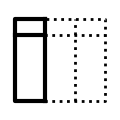

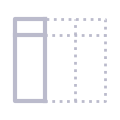

In [8]:
def draw_column(color, name):
    makefig()
    bot = .1
    plt.plot([0,1,1,0,0], [bot,bot,1,1,bot], color=color, lw=2, ls=':')
    plt.plot([.66, .66], [bot, 1], color=color, lw=2, ls=':')
    plt.plot([.0, 1], [.83, .83], color=color, lw=2, ls=':')
    plt.plot([.33, .33], [bot, 1], color=color, lw=3)
    plt.plot([.33, 0, 0, .33], [1, 1, bot, bot], color=color, lw=3)
    plt.plot([0, .33], [.83, .83], color=color, lw=3)
    plt.ylim(0,1.1)
    pngstrings[name] = tobase64()

draw_column(light, 'column')
draw_column(dark, 'column_dark')

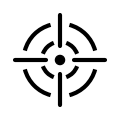

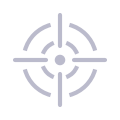

In [9]:
def draw_target(color, name):
    makefig()
    plt.gca().add_patch(Arc((.5,.5), width=.4, height=.4, edgecolor=color, facecolor='none', lw=3,
        theta1=20, theta2=70))
    plt.gca().add_patch(Arc((.5,.5), width=.4, height=.4, edgecolor=color, facecolor='none', lw=3,
        theta1=110, theta2=160))
    plt.gca().add_patch(Arc((.5,.5), width=.4, height=.4, edgecolor=color, facecolor='none', lw=3,
        theta1=200, theta2=250))
    plt.gca().add_patch(Arc((.5,.5), width=.4, height=.4, edgecolor=color, facecolor='none', lw=3,
        theta1=290, theta2=340))
    plt.gca().add_patch(Arc((.5,.5), width=.8, height=.8, edgecolor=color, facecolor='none', lw=3,
        theta1=15, theta2=75))
    plt.gca().add_patch(Arc((.5,.5), width=.8, height=.8, edgecolor=color, facecolor='none', lw=3,
        theta1=105, theta2=165))
    plt.gca().add_patch(Arc((.5,.5), width=.8, height=.8, edgecolor=color, facecolor='none', lw=3,
        theta1=195, theta2=255))
    plt.gca().add_patch(Arc((.5,.5), width=.8, height=.8, edgecolor=color, facecolor='none', lw=3,
        theta1=285, theta2=345))
    plt.gca().add_patch(plt.Circle((.5,.5), radius=0.05, edgecolor=color, facecolor=color))
    plt.plot([0.5, 0.5], [.65, 1], color=color, lw=3, solid_capstyle='round')
    plt.plot([0.5, 0.5], [.35, 0], color=color, lw=3, solid_capstyle='round')
    plt.plot([0, 0.35], [.5, .5], color=color, lw=3, solid_capstyle='round')
    plt.plot([0.65, 1], [.5, .5], color=color, lw=3, solid_capstyle='round')
    pngstrings[name] = tobase64()

draw_target(light, 'target')
draw_target(dark, 'target_dark')


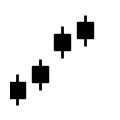

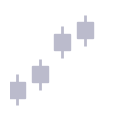

In [10]:
def draw_box(color, name):
    makefig()
    np.random.seed(234234)
    x = np.arange(0,4)
    y = np.random.normal(x, scale=.4)*.75
    plt.errorbar(x, y, yerr=.5, color=color, 
                 lw=2, capthick=2, capsize=0, markersize=12, marker='s', ls='')
    plt.xlim(-.3,4.1)
    pngstrings[name] = tobase64()

draw_box(light, 'boxplot')
draw_box(dark, 'boxplot_dark')


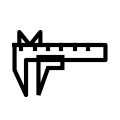

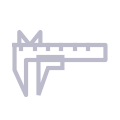

In [11]:
def draw_caliper(color, name):
    makefig()
    
    # Outline
    plt.plot([0,   .95,  .95,  .12, .12, 0, 0],
             [.25, .25, .1, .1, -.25, -0, .25],
             lw=3, color=color)
    
    # Slider
    a = np.array([[.25, .25, .35, .5,   .5, .25],
                 [.12, -.25, .02,  .02, .13, .13]]).transpose()
    p = plt.Polygon(a, edgecolor=color, lw=3, facecolor='none', zorder=10)
    
    # Inner-diameter calipers
    plt.plot([.05, .05, .16, .27, .27], [.25, .38, .25, .38, .25],
            color=color, lw=3)
    
    # Ruler ticks
    plt.plot([.21, .21], [.25, .21], color=color, lw=3)
    plt.plot([.35, .35], [.25, .21], color=color, lw=3)
    plt.plot([.49, .49], [.25, .21], color=color, lw=3)
    plt.plot([.63, .63], [.25, .21], color=color, lw=3)
    plt.plot([.77, .77], [.25, .21], color=color, lw=3)
    plt.plot([.07, .07], [.25, .21], color=color, lw=3)
    plt.gca().add_patch(p)
    plt.ylim(-.4,.6)
    
    pngstrings[name] = tobase64()

draw_caliper(light, 'calipers')
draw_caliper(dark, 'calipers_dark')


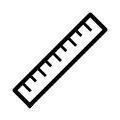

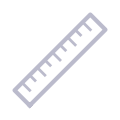

In [12]:
def draw_ruler(color, name):
    makefig()
    tr = transforms.Affine2D().rotate_deg(45)
    
    plt.plot([0, 5, 5, 0, 0], [0, 0, 1, 1, 0], lw=3, color=color, transform=tr + plt.gca().transData)
    for i in range(1,5):
        plt.plot([i, i], [1, .65], color=color, lw=2, transform=tr + plt.gca().transData)
    for i in np.arange(0.5,5.5):
        plt.plot([i, i], [1, .5], color=color, lw=2, transform=tr + plt.gca().transData)
    pngstrings[name] = tobase64()

draw_ruler(light, 'ruler')
draw_ruler(dark, 'ruler_dark')

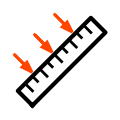

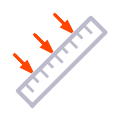

In [13]:
def draw_sweep(color, name):
    makefig()
    tr = transforms.Affine2D().rotate_deg(45)
    
    plt.plot([0, 5, 5, 0, 0], [0, 0, 1, 1, 0], lw=3, color=color, transform=tr + plt.gca().transData)
    for i in range(1,5):
        plt.plot([i, i], [1, .65], color=color, lw=2, transform=tr + plt.gca().transData)
    for i in np.arange(0.5,5.5):
        plt.plot([i, i], [1, .5], color=color, lw=2, transform=tr + plt.gca().transData)
        
    plt.arrow(1.125, 2.35, dx=0, dy=-1.2, lw=2, transform=tr + plt.gca().transData, color=accent, capstyle='round', length_includes_head=True, head_width=.35)
    plt.arrow(2.5, 2.35, dx=0, dy=-1.2, lw=2, transform=tr + plt.gca().transData, color=accent, capstyle='round', length_includes_head=True, head_width=.35)
    plt.arrow(3.875, 2.35, dx=0, dy=-1.2, lw=2, transform=tr + plt.gca().transData, color=accent, capstyle='round', length_includes_head=True, head_width=.35)
    pngstrings[name] = tobase64()

draw_sweep(light, 'rulersweep')
draw_sweep(dark, 'rulersweep_dark')

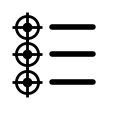

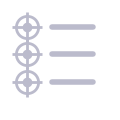

In [14]:
def draw_targetlist(color, name):
        
    makefig()
    plt.plot([0],[1], marker='o', mec=color, mfc='none', markersize=16, mew=2)
    plt.plot([0],[1], marker='o', color=color, markersize=6)
    plt.plot([0],[1], marker='+', color=color, markersize=22, mew=2)
    plt.plot([.75, 2], [1,1], color=color, lw=4, solid_capstyle='round')
    plt.plot([0],[.75], marker='o', mec=color, mfc='none', markersize=16, mew=2)
    plt.plot([0],[.75], marker='o', color=color, markersize=6)
    plt.plot([0],[.75], marker='+', color=color, markersize=22, mew=2)
    plt.plot([.75, 2], [.75,.75], color=color, lw=4, solid_capstyle='round')
    plt.plot([0],[.5], marker='o', mec=color, mfc='none', markersize=16, mew=2)
    plt.plot([0],[.5], marker='o', color=color, markersize=6)
    plt.plot([0],[.5], marker='+', color=color, markersize=22, mew=2)
    plt.plot([.75, 2], [.5,.5], color=color, lw=4, solid_capstyle='round')
    plt.xlim(-.5,2.5)
    plt.ylim(.25, 1.15)
    pngstrings['targetlist'] = tobase64()

draw_targetlist(light, 'targetlist')
draw_targetlist(dark, 'targetlist_dark')

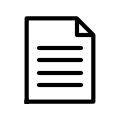

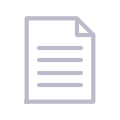

In [15]:
def draw_report(color, name):
    makefig()
    plt.plot([0, 0, 6, 8, 8, 0], [0, 10, 10, 8, 0, 0], solid_joinstyle='round', lw=3, color=color)
    plt.plot([6, 6, 8], [10, 8, 8], lw=3, color=color, solid_joinstyle='round', solid_capstyle='butt')
    plt.plot([1.5, 6.5], [2,2], color=color, lw=3, solid_capstyle='round')
    plt.plot([1.5, 6.5], [3.5,3.5], color=color, lw=3, solid_capstyle='round')
    plt.plot([1.5, 6.5], [5,5], color=color, lw=3, solid_capstyle='round')
    plt.plot([1.5, 6.5], [6.5,6.5], color=color, lw=3, solid_capstyle='round')
    plt.xlim(-2,10)
    plt.ylim(-1,11)
    pngstrings[name] = tobase64()

draw_report(light, 'report')
draw_report(dark, 'report_dark')

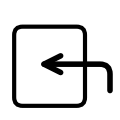

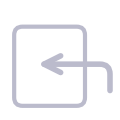

In [16]:
def draw_load(color, name):
    makefig()
    bb = mtransforms.Bbox([[.05,.05], [.7, .8]])
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.1",
                             lw=3,
                             fc='none',
                             ec=color)
    plt.annotate('', (.2,.45), (1.1, .1),
                arrowprops={'arrowstyle':'->', 'color': color, 'lw':4,  'mutation_scale': 30, 'connectionstyle':'angle,angleA=90,angleB=0,rad=10'})
    plt.xlim(-.1,1.1)
    plt.ylim(-.1,1.1)
    plt.gca().add_patch(p_bbox);
    pngstrings[name] = tobase64()


draw_load(light, 'loaddat')
draw_load(dark, 'loaddat_dark')


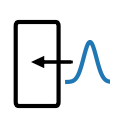

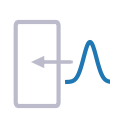

In [17]:
def draw_loaddist(color, name):
    makefig()
    bb = mtransforms.Bbox([[.2,.1], [1.5, 2.0]])
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                                 abs(bb.width), abs(bb.height),
                                 boxstyle="round,pad=0.1",
                                lw=3,
                                fc='none',
                                 ec=color)
    xx = np.linspace(-.8,.8,num=100)
    yy = np.exp(-(xx**2)*10) + .6
    plt.plot(xx+2.7,yy, lw=3)
    plt.arrow(2.05, 1.1, dx=-1, dy=0, lw=2, head_width=.2, facecolor=color, edgecolor=color)
    plt.xlim(-.1,3.4)
    plt.ylim(-.1,2.4)
    plt.gca().add_patch(p_bbox)
    pngstrings[name] = tobase64()

draw_loaddist(light, 'loaddist')
draw_loaddist(dark, 'loaddist_dark')

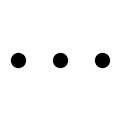

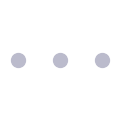

In [18]:
def draw_more(color, name):
    makefig()
    plt.plot([0,1,2],[0,0,0], marker='o', ls='', markersize=10, color=color)
    plt.xlim(-.2, 2.2)
    pngstrings[name] = tobase64()

draw_more(light, 'more')
draw_more(dark, 'more_dark')


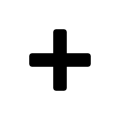

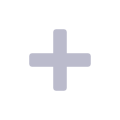

In [19]:
def draw_add(color, name):
    makefig()
    plt.plot(0,0, marker='+', ls='', markersize=40, mew=4, color=color)
    plt.xlim(-.2, .2)
    pngstrings[name] = tobase64()

draw_add(light, 'add')
draw_add(dark, 'add_dark')

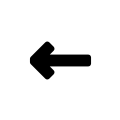

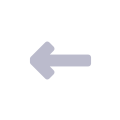

In [20]:
def draw_left(color, name):
    makefig()
    plt.plot(0,0, marker=r'←', ls='', markersize=40, mew=4, color=color)
    plt.xlim(-.2, .2)
    pngstrings[name] = tobase64()

draw_left(light, 'left')
draw_left(dark, 'left_dark')

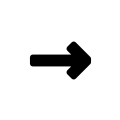

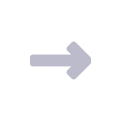

In [21]:
def draw_right(color, name):
    makefig()
    plt.plot(0,0, marker=r'→', ls='', markersize=40, mew=4, color=color)
    plt.xlim(-.2, .2)
    pngstrings[name] = tobase64()

draw_right(light, 'right')
draw_right(dark, 'right_dark')

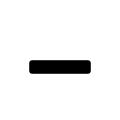

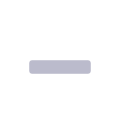

In [22]:
def draw_remove(color, name):
    makefig()
    plt.plot(0,0, marker='−', ls='', markersize=40, mew=4, color=color)
    plt.xlim(-.2, .2)
    plt.ylim(-.15, .2)
    pngstrings[name] = tobase64()

draw_remove(light, 'remove')
draw_remove(dark, 'remove_dark')

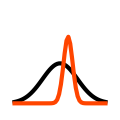

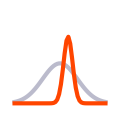

In [23]:
def draw_dists(color, name):
    makefig()
    x = np.linspace(-4.5,4.5,50)
    y = 0.6 * np.exp(-x**2/6)
    y2 = np.exp(-(x-.8)**2/.4)
    plt.plot(x, y, lw=3, color=color)
    plt.plot(x, y2, lw=3, color=accent)
    plt.ylim(-.1, 1.4);
    pngstrings[name] = tobase64()

draw_dists(light, 'dists')
draw_dists(dark, 'dists_dark')

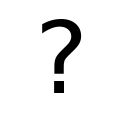

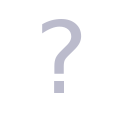

In [24]:
def draw_help(color, name):
    makefig()
    plt.text(0, 0, '?', fontsize=72, color=color)
    plt.ylim(-.1, .5);
    plt.xlim(-.2, .6);
    pngstrings[name] = tobase64()

draw_help(light, 'help')
draw_help(dark, 'help_dark')

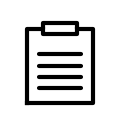

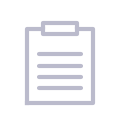

In [25]:
def draw_clip(color, name):
    makefig()
    plt.plot([0, 0,   2,  2, 6,   6, 8, 8, 8, 0],
             [0, 10, 10, 10.7, 10.7, 10, 10, 8, 0, 0],
             solid_joinstyle='round', lw=3, color=color)
    plt.plot([ 2, 2, 6, 6],
             [10, 9.3, 9.3, 10], solid_joinstyle='round', lw=3, color=color)
    plt.plot([1.5, 6.5], [2,2], color=color, lw=3, solid_capstyle='round')
    plt.plot([1.5, 6.5], [3.5,3.5], color=color, lw=3, solid_capstyle='round')
    plt.plot([1.5, 6.5], [5,5], color=color, lw=3, solid_capstyle='round')
    plt.plot([1.5, 6.5], [6.5,6.5], color=color, lw=3, solid_capstyle='round')
    plt.xlim(-2,10)
    plt.ylim(-1,12.5)
    pngstrings[name] = tobase64()

draw_clip(light, 'clipboard')
draw_clip(dark, 'clipboard_dark')

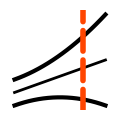

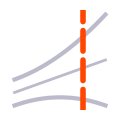

In [26]:
def draw_interval(color, name):
    makefig()
    np.random.seed(142941)
    
    x = np.linspace(0, 1, num=20)
    y = x/4
    yp = y + (x/2)**2 + .1
    ym = y - (x/2)**2 - .1
    
    plt.plot(x, y, color=color, lw=2)
    plt.plot(x, yp, color=color, ls='-', lw=3, dash_capstyle='round')
    plt.plot(x, ym, color=color, ls='-', lw=3, dash_capstyle='round')
    plt.axvline(.75, color=accent, lw=4, ls='--', dash_capstyle='round')
    pngstrings[name] = tobase64()

draw_interval(light, 'interval')
draw_interval(dark, 'interval_dark')

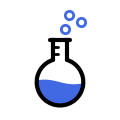

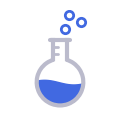

In [27]:
def draw_wizard(color, name):
    makefig(frame=False)
    plt.gca().add_patch(Arc((0, 0), width=1, height=1, theta1=105, theta2=75, lw=3, color=color))
    plt.plot([.15, .15], [.5, .9], lw=3, color=color)
    plt.plot([-.15, -.15], [.5, .9], lw=3, color=color)
    plt.plot([-.21, .21], [.9, .9], lw=3, color=color, solid_capstyle='round')
    plt.plot([-.15, -.05], [.75, .75], lw=2, color=color, solid_capstyle='round')
    plt.plot([-.15, -.05], [.6, .6], lw=2, color=color, solid_capstyle='round')
    xx = np.linspace(-.5, .5)
    yy = np.sin(xx*5-3)/20
    y2 = -np.sqrt(.5**2-xx**2)
    plt.fill_between(xx, yy, y2=y2, color=blue, zorder=0)
    plt.plot(.45, 1.3, marker='o', mfc='none', color=blue, mew=2)
    plt.plot(.1, 1.15, marker='o', mfc='none', color=blue, mew=2)
    plt.plot(.2, 1.45, marker='o', mfc='none', color=blue, mew=2)
    plt.axis('equal');
    pngstrings[name] = tobase64()

draw_wizard(light, 'wizard')
draw_wizard(dark, 'wizard_dark')

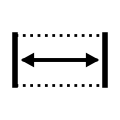

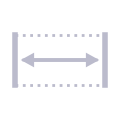

In [28]:
def draw_tolerance(color, name):
    makefig()
    plt.plot([-1, -1], [-.5, .5], ls='-', lw=4, color=color)
    plt.plot([1, 1], [-.5, .5], ls='-', lw=4, color=color)
    plt.plot([-1, 1], [.5, .5], ls=':', lw=2, color=color)
    plt.plot([-1, 1], [-.5, -.5], ls=':', lw=2, color=color)
    plt.arrow(-.8, 0, 1.6, 0, lw=2, head_width=.2, head_length=.2, length_includes_head=True, color=color)
    plt.arrow(.8, 0, -1.6, 0, lw=2, head_width=.2, head_length=.2, length_includes_head=True, color=color)
    plt.ylim(-1, 1)
    pngstrings[name] = tobase64()


draw_tolerance(light, 'tolerance')
draw_tolerance(dark, 'tolerance_dark')

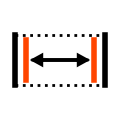

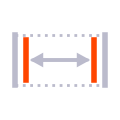

In [29]:
def draw_gb(color, name):
    makefig()
    plt.plot([-1, -1], [-.5, .5], ls='-', lw=4, color=color)
    plt.plot([1, 1], [-.5, .5], ls='-', lw=4, color=color)
    plt.plot([-1, 1], [.5, .5], ls=':', lw=2, color=color)
    plt.plot([-1, 1], [-.5, -.5], ls=':', lw=2, color=color)
    plt.plot([-.75, -.75], [-.4, .4], ls='-', lw=4, color=accent)
    plt.plot([.75, .75], [-.4, .4], ls='-', lw=4, color=accent)
    plt.arrow(-.6, 0, 1.2, 0, lw=2, head_width=.2, head_length=.2, length_includes_head=True, color=color)
    plt.arrow(.6, 0, -1.2, 0, lw=2, head_width=.2, head_length=.2, length_includes_head=True, color=color)
    plt.ylim(-1, 1)
    pngstrings[name] = tobase64()

draw_gb(light, 'guardband')
draw_gb(dark, 'guardband_dark')

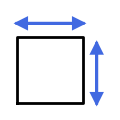

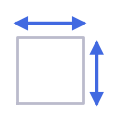

In [30]:
def draw_indirect(color, name):
    makefig()
    plt.plot([0, 0, 1, 1, 0], [0, 1, 1, 0, 0], color=color, lw=2)
    plt.arrow(0, 1.2, 1, 0, color=blue, lw=2, head_width=.15, head_length=.15, length_includes_head=True)
    plt.arrow(1, 1.2, -1, 0, color=blue, lw=2, head_width=.15, head_length=.15, length_includes_head=True)
    plt.arrow(1.2, 0, 0, .9, color=blue, lw=2, head_width=.15, head_length=.15, length_includes_head=True)
    plt.arrow(1.2, .9, 0, -.9, color=blue, lw=2, head_width=.15, head_length=.15, length_includes_head=True)
    plt.xlim(-.1, 1.4)
    plt.ylim(-.1, 1.4)
    pngstrings[name] = tobase64()

draw_indirect(light, 'indirect')
draw_indirect(dark, 'indirect_dark')


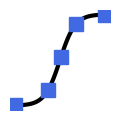

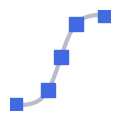

In [31]:
def draw_curve(color, name):
    makefig()
    x = np.linspace(-1, 1, num=50)
    y = 1 / (1 + np.exp(-x*6))
    plt.plot(x, y, lw=3, color=color)
    plt.plot(x[0], y[0], marker='s', color=blue, markersize=10)
    plt.plot(x[-1], y[-1], marker='s', color=blue, markersize=10)
    plt.plot(x[25], y[25], marker='s', color=blue, markersize=10)
    plt.plot(x[18], y[18], marker='s', color=blue, markersize=10)
    plt.plot(x[33], y[33], marker='s', color=blue, markersize=10)
    pngstrings[name] = tobase64()

draw_curve(light, 'curve')
draw_curve(dark, 'curve_dark')

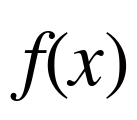

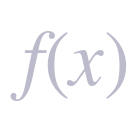

In [32]:
def draw_eqn(color, name):
    makefig()
    plt.text(0, .25, 'f(x)', color=color, math_fontfamily='stix', fontsize=56)
    pngstrings[name] = tobase64()

draw_eqn(light, 'equation')
draw_eqn(dark, 'equation_dark')

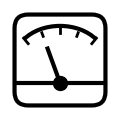

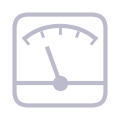

In [33]:
def draw_meter(color, name):
    makefig()
    rect = FancyBboxPatch(
        (.0, .0),
        boxstyle="round, pad=0, rounding_size=0.15",
        color=color,
        width=1,
        height=1,
        lw=3,
        fill=False)
    plt.gca().add_patch(rect)
    plt.gca().add_patch(
        Arc((.5, .5), 1, .75, color=color, theta1=30, theta2=150, lw=3)
    )
    
    # Ticks
    plt.plot([.5, .5], [.8, .85], lw=2, color=color)
    plt.plot([.85, .9], [.68, .74], lw=2, color=color)
    plt.plot([.1, .15], [.74, .68], lw=2, color=color)
    plt.plot([.3, .315], [.8, .76], lw=2, color=color)
    plt.plot([.7, .685], [.8, .76], lw=2, color=color)
    
    # Needle
    th = 110
    cx = .5
    cy = .25
    plt.plot(
        (cx, cx + .4*np.cos(np.radians(th))),
        (cy, cy + .4*np.sin(np.radians(th))),
        color=color,
        lw=3
    )
    plt.plot(cx, cy, marker='o', color=color, markersize=10)
    plt.plot([0, 1], [cy, cy], lw=3, color=color)
    
    pngstrings[name] = tobase64()

draw_meter(light, 'meter')
draw_meter(dark, 'meter_dark')

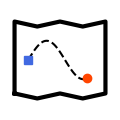

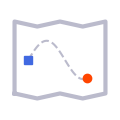

In [34]:
def draw_map(color, name):
    makefig()
    dy = .065
    w = 1
    h = 1
    plt.plot([0, w/4, w/2, 3*w/4, w, w, 3*w/4, w/2, w/4, 0, 0],
             [dy, 0, dy, 0, dy, h, h-dy, 1, h-dy, h, dy],
             color=color,
             lw=3)
    plt.ylim(-.15, 1.15)
    
    x = np.linspace(.15, .8)
    y = .5 + .25*np.sin((x-.15)*7.75)
    plt.plot(x, y, color=color, ls='--')
    plt.plot(x[0], y[0], marker='s', color=blue, markersize=6)
    plt.plot(x[-1], y[-1], marker='o', color=accent, markersize=6)
    
    pngstrings[name] = tobase64()

draw_map(light, 'map')
draw_map(dark, 'map_dark')

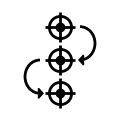

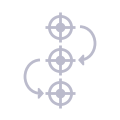

In [35]:
def draw_x(color, name):
        
    makefig()
    plt.plot([0],[1], marker='o', mec=color, mfc='none', markersize=16, mew=2)
    plt.plot([0],[1], marker='o', color=color, markersize=6)
    plt.plot([0],[1], marker='+', color=color, markersize=22, mew=2)
    plt.plot([0],[.5], marker='o', mec=color, mfc='none', markersize=16, mew=2)
    plt.plot([0],[.5], marker='o', color=color, markersize=6)
    plt.plot([0],[.5], marker='+', color=color, markersize=22, mew=2)
    plt.plot([0],[0], marker='o', mec=color, mfc='none', markersize=16, mew=2)
    plt.plot([0],[0], marker='o', color=color, markersize=6)
    plt.plot([0],[0], marker='+', color=color, markersize=22, mew=2)

    
    arc = Arc((1, (1+.5)/2), 1.5, (1-.5), theta1=-90, theta2=90, angle=0, color=color, lw=2)
    plt.arrow(1.1, .5, -.15, 0, length_includes_head=True, width=.05, color=color, fill=color)
    plt.gca().add_patch(arc)
    arc = Arc((-1, .25), 1.5, (1-.5), theta1=-90, theta2=90, angle=180, color=color, lw=2)
    plt.arrow(-1, .0, .15, 0, length_includes_head=True, width=.05, color=color, fill=color)
    plt.gca().add_patch(arc)

    plt.xlim(-2.5 ,2.5)
    plt.ylim(-.25, 1.25)
    pngstrings[name] = tobase64()

draw_x(light, 'trace')
draw_x(dark, 'trace_dark')

In [37]:
with open('PSLcal_logo.png', 'rb') as f:
    logo = f.read()

with open('SNL_Horizontal_Black_Blue.png', 'rb') as f:
    logosnl = f.read()
    
with open('snllogo.py', 'w') as f:
    f.write('# snllogo.py autogenerated from icons.ipynb. Icon stored in PNG/base64.\n\n')
    f.write('logo = {}'.format(base64.b64encode(logo)))
    f.write('\n\n')
    f.write('logosnl = {}'.format(base64.b64encode(logosnl)))

In [38]:
with open('pngs.py', 'w') as f:
    f.write('# icons.py autogenerated from icons.ipynb\n\n')
    for k, v in pngstrings.items():
        f.write("{} = {}".format(k, v))
        f.write('\n\n')